In [27]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

In [28]:
df = pd.read_csv("SPAM text message 20170820 - Data.csv")

In [29]:
print(df.info())
print(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  5572 non-null   object
 1   Message   5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB
None
  Category                                            Message
0      ham  Go until jurong point, crazy.. Available only ...
1      ham                      Ok lar... Joking wif u oni...
2     spam  Free entry in 2 a wkly comp to win FA Cup fina...
3      ham  U dun say so early hor... U c already then say...
4      ham  Nah I don't think he goes to usf, he lives aro...


In [30]:
df.columns = ["label", "message"]
print(df)

     label                                            message
0      ham  Go until jurong point, crazy.. Available only ...
1      ham                      Ok lar... Joking wif u oni...
2     spam  Free entry in 2 a wkly comp to win FA Cup fina...
3      ham  U dun say so early hor... U c already then say...
4      ham  Nah I don't think he goes to usf, he lives aro...
...    ...                                                ...
5567  spam  This is the 2nd time we have tried 2 contact u...
5568   ham               Will ü b going to esplanade fr home?
5569   ham  Pity, * was in mood for that. So...any other s...
5570   ham  The guy did some bitching but I acted like i'd...
5571   ham                         Rofl. Its true to its name

[5572 rows x 2 columns]


In [31]:
df["label_encoded"] = df["label"].map({"ham": 0, "spam": 1})

In [32]:
X_train, X_test, y_train, y_test = train_test_split(
    df["message"], df["label_encoded"], test_size=0.2, random_state=42
)

In [33]:
# Step 7: TF-IDF Vectorization
vectorizer = TfidfVectorizer(stop_words="english")
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

In [34]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train_tfidf, y_train)

KNeighborsClassifier(n_neighbors=3)

In [35]:
y_pred = knn.predict(X_test_tfidf)

In [36]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.9282511210762332

Classification Report:
               precision    recall  f1-score   support

           0       0.92      1.00      0.96       966
           1       1.00      0.46      0.63       149

    accuracy                           0.93      1115
   macro avg       0.96      0.73      0.80      1115
weighted avg       0.93      0.93      0.92      1115


Confusion Matrix:
 [[966   0]
 [ 80  69]]


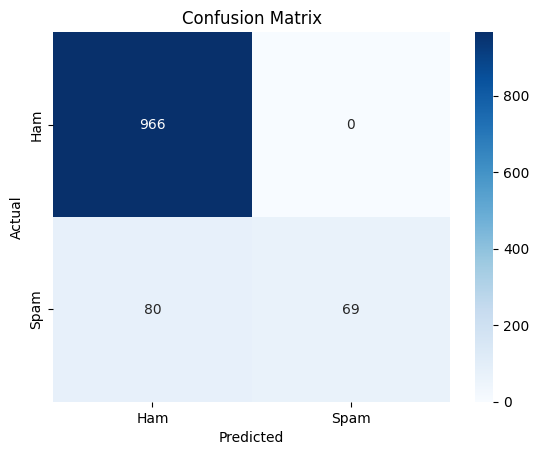

In [37]:
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues', xticklabels=['Ham', 'Spam'], yticklabels=['Ham', 'Spam'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [38]:
k_values = list(range(1, 21))
errors = []
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_tfidf, y_train)
    y_pred_k = knn.predict(X_test_tfidf)
    errors.append(1-accuracy_score(y_test, y_pred_k))

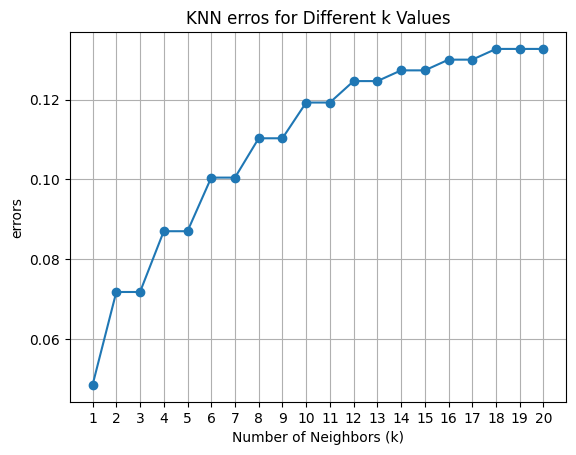

In [39]:
plt.plot(k_values, errors, marker='o')
plt.xlabel("Number of Neighbors (k)")
plt.ylabel("errors")
plt.title("KNN erros for Different k Values")
plt.xticks(k_values)
plt.grid(True)
plt.show()